# Tutorial - Time Series Forecasting - Moving average

The goal is to forecast time series with the Moving Average Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function Moving Average with Air Passengers, and 5) Function Moving Average with Wine Sales.

References Analytics Vidhya - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [2]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [3]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Moving Average Approach with JetRail 

This method consists of taking a "sliding window" of size n. The next values are based on the average of a fixed finite number of the previous values (e.g. previous 60 days, etc.)

In [4]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [6]:
# Create prediction table
y_hat = test.copy()
# Create Moving Average from last 60 periods
y_hat['moving_avg'] = train['Count'].rolling(60).mean().iloc[-1]

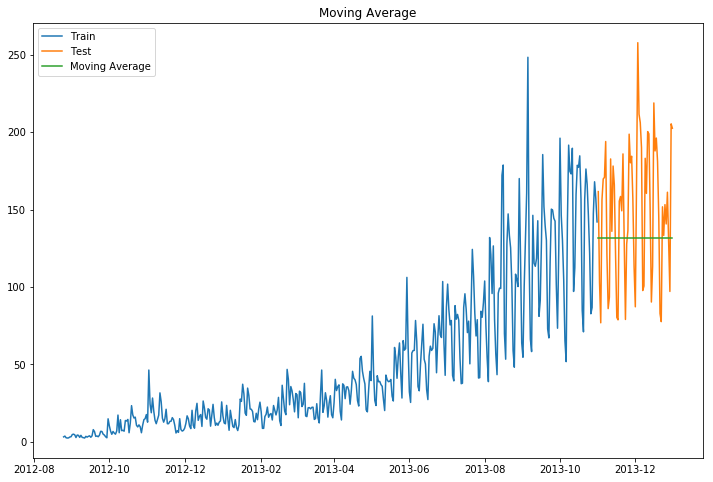

In [8]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['moving_avg'], label='Moving Average')
plt.legend(loc='best')
plt.title("Moving Average")
plt.show()

# RMSE Calculation

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.moving_avg))
print('RMSE = '+str(rms))

RMSE = 46.728407251069626


# Moving Average Approach with Air Passagers

In [26]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [11]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

In [14]:
y_hat = test.copy()
y_hat['moving_avg'] = train['Passengers'].rolling(len(test)).mean().iloc[-1]
y_hat.describe()

,Passengers,moving_avg
count,44.000000,4.400000e+01
mean,421.068182,2.809773e+02
std,77.330279,1.150012e-13
min,305.000000,2.809773e+02
25%,359.750000,2.809773e+02
50%,406.500000,2.809773e+02
75%,465.500000,2.809773e+02
max,622.000000,2.809773e+02


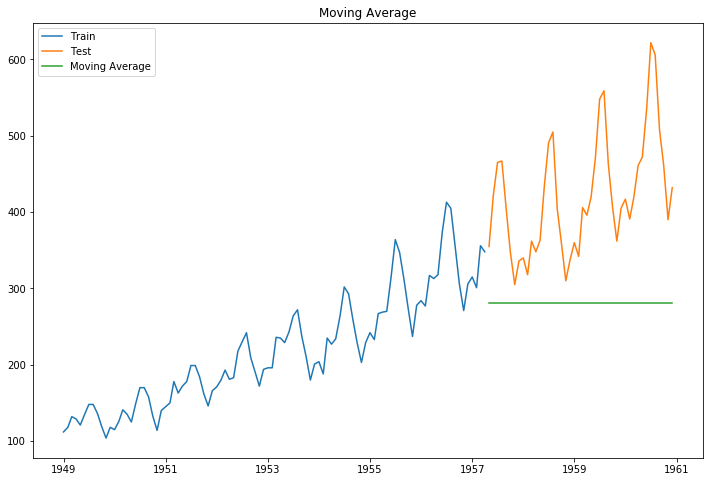

In [16]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['moving_avg'], label='Moving Average')
plt.legend(loc='best')
plt.title("Moving Average")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.moving_avg))
print(rms)

159.59174898150343


# Function Moving Average Approach

In [27]:
def moving_avg_forecasting(mydf,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    dd = np.asarray(train[colval])
    y_hat = test.copy()
    y_hat['moving_avg'] = train[colval].rolling(len(test)).mean().iloc[-1]
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['moving_avg'], label='Moving Average')
    plt.legend(loc='best')
    plt.title("Moving Average Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.moving_avg))
    print('RMSE = '+str(rms))

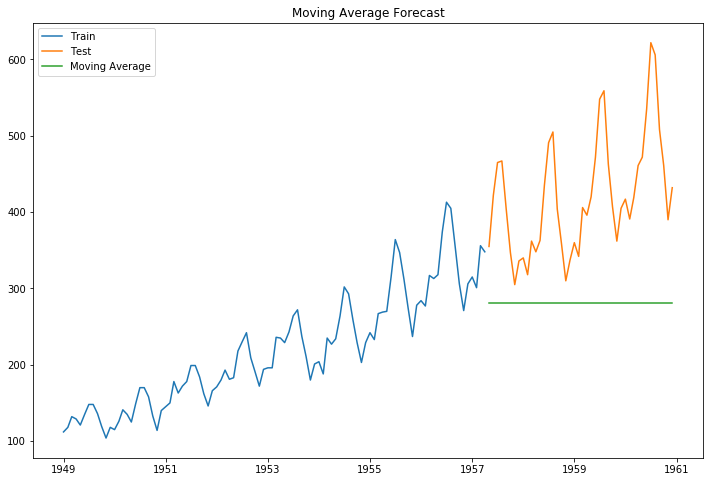

RMSE = 159.59174898150343


In [28]:
moving_avg_forecasting(df,'Passengers',0.7)

# Testing Function Moving Average Approach with Wine Dataset

In [31]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


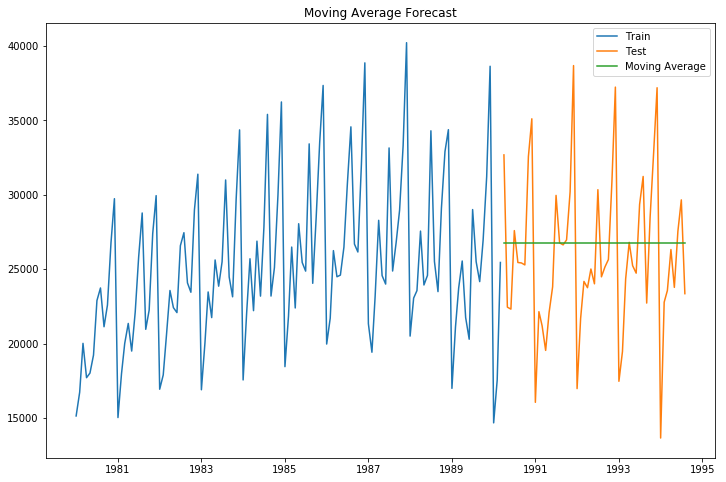

RMSE = 5254.561222277408


In [32]:
moving_avg_forecasting(df,'Sales',0.7)